# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [6]:
import numpy as np
import matplotlib.pyplot as plt

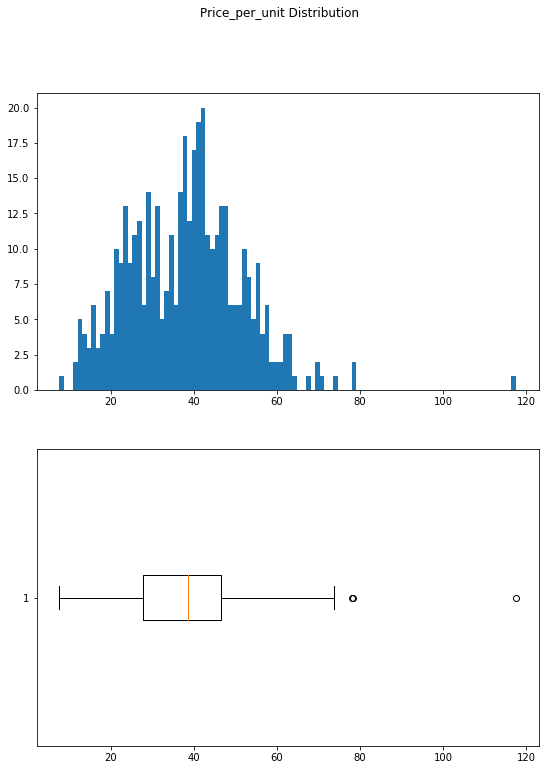

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(9,12))
target = data['price_per_unit']


ax[0].hist(target, bins=100)
ax[1].boxplot(target, vert=False)

fig.suptitle('Price_per_unit Distribution')
plt.show()

In [18]:
data = data[data['price_per_unit'] < 70]
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,2013.146875,17.768627,1095.813873,4.063725,24.968931,121.533245,37.341422
std,0.282129,11.294566,1267.491418,2.938494,0.012470,0.015418,12.476363
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.100000,289.324800,1.000000,24.962990,121.527600,27.300000
50%,2013.167000,16.150000,492.944150,4.000000,24.971100,121.538535,38.250000
75%,2013.417000,28.050000,1463.122750,6.000000,24.977998,121.543222,46.100000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,69.700000


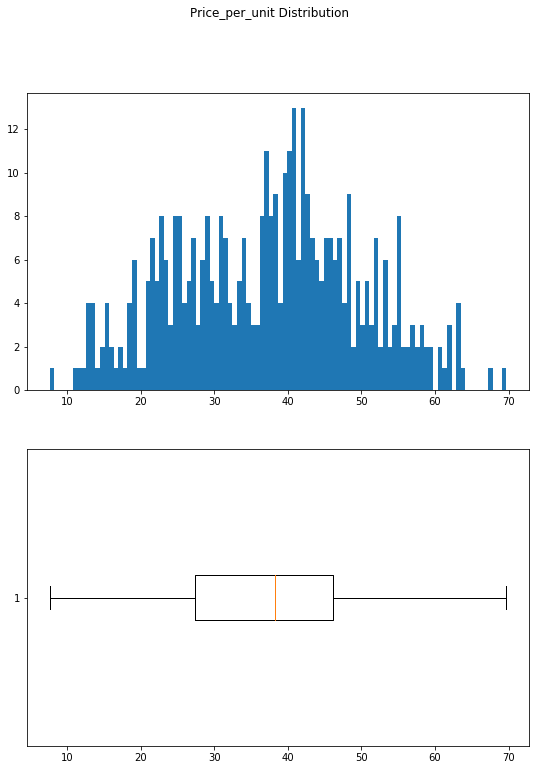

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(9,12))
target = data['price_per_unit']


ax[0].hist(target, bins=100)
ax[1].boxplot(target, vert=False)

fig.suptitle('Price_per_unit Distribution')
plt.show()

In [20]:
features = list(data.columns.values[:-1])
features

['transaction_date',
 'house_age',
 'transit_distance',
 'local_convenience_stores',
 'latitude',
 'longitude']

In [21]:
numeric_features = ['house_age', 'transit_distance', 'latitude', 'longitude']
categorical_features = ['local_convenience_stores']

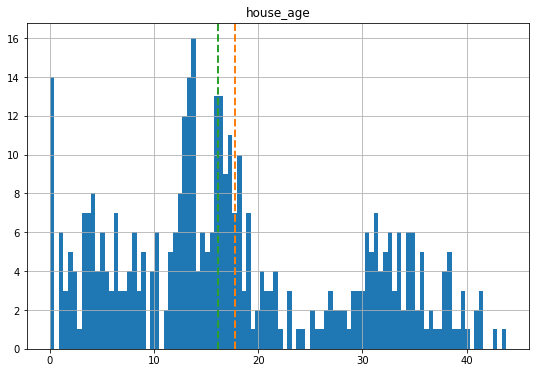

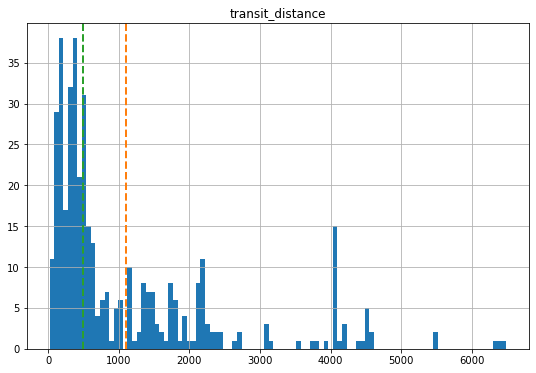

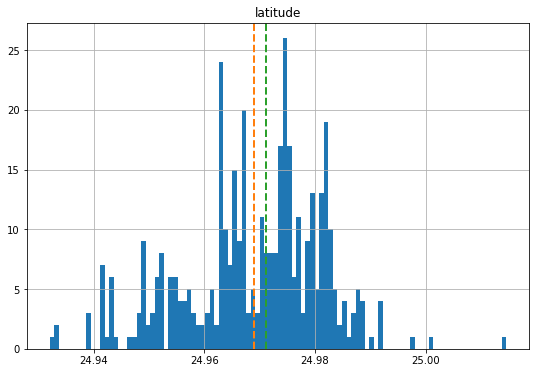

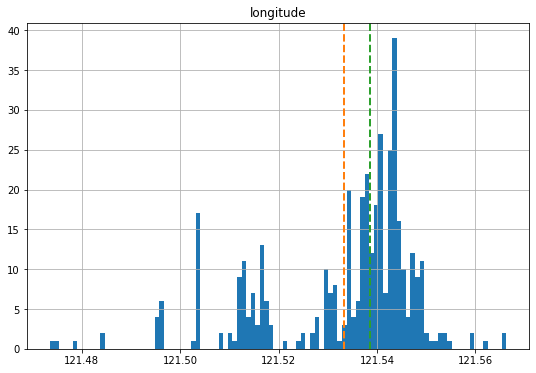

In [22]:
for col in numeric_features:
    fig = plt.figure(figsize=((9,6)))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100)
    ax.set_title(col)
    ax.axvline(feature.mean(), color='C1', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='C2', linestyle='dashed', linewidth=2)
plt.show()

/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


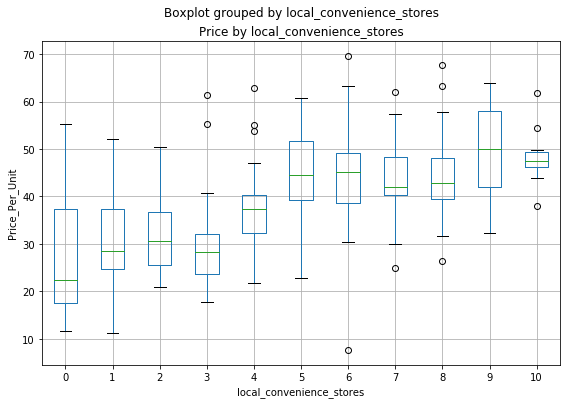

In [23]:
for col in categorical_features:
    fig = plt.figure(figsize=((9,6)))
    ax = fig.gca()
    data.boxplot(column='price_per_unit', by=col, ax=ax)
    ax.set_ylabel('Price_Per_Unit')
    ax.set_title(f'Price by {col}')
plt.show()


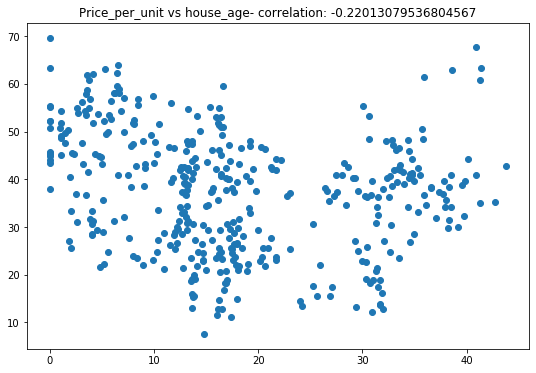

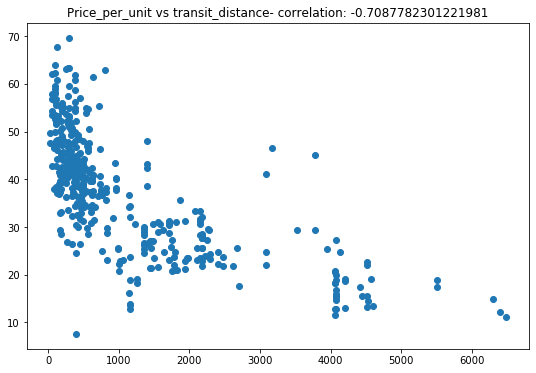

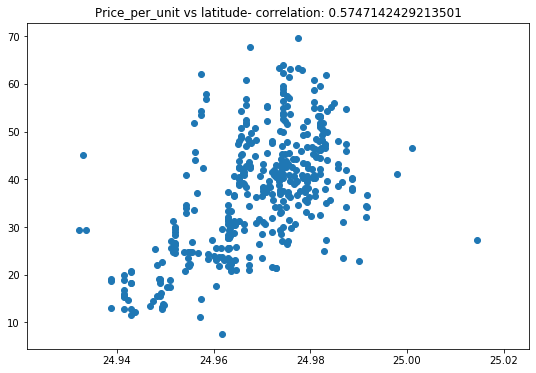

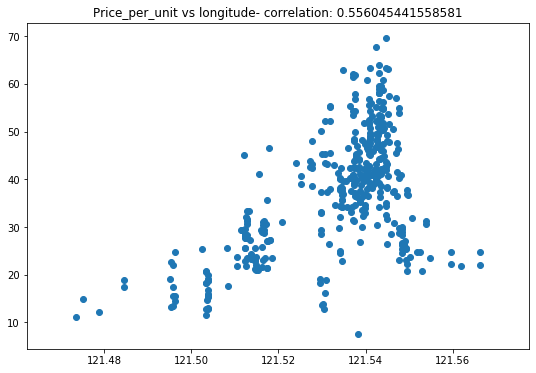

In [29]:
for col in numeric_features:
    fig = plt.figure(figsize=((9,6)))
    ax = fig.gca()
    plt.scatter(data[col], data['price_per_unit'])
    correlation = data[col].corr(data['price_per_unit'])
    ax.set_title(f'Price_per_unit vs {col}- correlation: {str(correlation)}')

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [56]:
X, y = data[features[1:]].values, data['price_per_unit'].values

In [57]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

In [58]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [59]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred = model.predict(X_test)

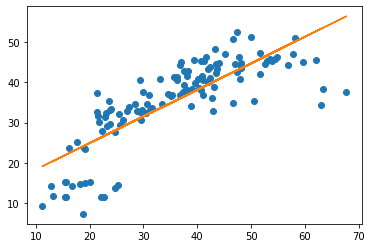

In [61]:
plt.scatter(y_test, y_pred)
model_test = linear_model.LinearRegression()
model_test.fit(y_test[:,np.newaxis], y_pred)
plt.plot(y_test, model_test.predict(y_test[:,np.newaxis]), color='C1')
plt.show()

In [62]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

59.93968763449785

In [63]:
rmse = np.sqrt(mse)
rmse

7.742072567116499

In [64]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.634883434429871

In [65]:
features

['transaction_date',
 'house_age',
 'transit_distance',
 'local_convenience_stores',
 'latitude',
 'longitude']

In [66]:
X_new = np.array([[16.2, 289.3248, 5, 24.9823, 121.54348], [13.6, 4082.015, 0, 24.94155, 121.50381]])
model.predict(X_new)

array([45.30317323, 15.23781176])